In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", connect_args={'check_same_thread': False}, echo=True)

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

2019-05-03 11:30:11,978 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-05-03 11:30:11,986 INFO sqlalchemy.engine.base.Engine ()
2019-05-03 11:30:11,990 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-05-03 11:30:11,993 INFO sqlalchemy.engine.base.Engine ()
2019-05-03 11:30:12,000 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-05-03 11:30:12,003 INFO sqlalchemy.engine.base.Engine ()
2019-05-03 11:30:12,009 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("measurement")
2019-05-03 11:30:12,011 INFO sqlalchemy.engine.base.Engine ()
2019-05-03 11:30:12,017 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'measurement' AND type = 'table'
2019-05-03 11:30:12,021 INFO sqlalchemy.engine.base.Engine ()
2019-05-03 11:30:12,027 INFO sqlalchemy.

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
inspector = inspect(engine)

In [11]:
columns = inspector.get_columns("station")
for column in columns:
    print(column['name'], column['type'])

2019-05-03 11:30:12,150 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("station")
2019-05-03 11:30:12,151 INFO sqlalchemy.engine.base.Engine ()
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
columns = inspector.get_columns("measurement")
for column in columns:
    print(column['name'], column['type'])

2019-05-03 11:30:12,163 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("measurement")
2019-05-03 11:30:12,164 INFO sqlalchemy.engine.base.Engine ()
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# Converting date STR to date datetime
import datetime as dt
prcp_list = []

prcp_2017 = session.query(Measurement.prcp)
for row in prcp_2017:
    prcp_list.append(row)
print(prcp_list)

2019-05-03 11:30:12,177 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2019-05-03 11:30:12,178 INFO sqlalchemy.engine.base.Engine SELECT measurement.prcp AS measurement_prcp 
FROM measurement
2019-05-03 11:30:12,179 INFO sqlalchemy.engine.base.Engine ()
[(0.08,), (0.0,), (0.0,), (0.0,), (None,), (0.06,), (0.0,), (0.0,), (0.0,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.01,), (0.0,), (0.04,), (0.12,), (0.0,), (None,), (0.03,), (0.01,), (None,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.02,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (None,), (0.03,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.01,), (0.0,), (0.0,), (0.12,), (0.08,), (0.03,), (0.0,), (0.43,), (0.06,), (None,), (0.0,), (0.0,), (0.0,), (0.06,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (None,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.01,), (0.17,), (0.15,), (0.27,), (0.01,), (0.0,), (0.01,), (0.0,), (0.01,), (0.0

In [14]:
end_date_2017 = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

print(end_date_2017[0])

2019-05-03 11:30:12,312 INFO sqlalchemy.engine.base.Engine SELECT measurement.date AS measurement_date 
FROM measurement ORDER BY measurement.date DESC
 LIMIT ? OFFSET ?
2019-05-03 11:30:12,335 INFO sqlalchemy.engine.base.Engine (1, 0)
2017-08-23


In [15]:
end_date_2017 = dt.datetime.strptime(end_date_2017[0], "%Y-%m-%d")


In [16]:
tdelta = dt.timedelta(days=365)
query_date = (end_date_2017 - tdelta)
print(query_date)

2016-08-23 00:00:00


In [17]:
dates_1year = []
for i in session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date):
    dates_1year.append(i)
print(dates_1year)

2019-05-03 11:30:12,374 INFO sqlalchemy.engine.base.Engine SELECT measurement.date AS measurement_date, measurement.prcp AS measurement_prcp 
FROM measurement 
WHERE measurement.date >= ?
2019-05-03 11:30:12,376 INFO sqlalchemy.engine.base.Engine ('2016-08-23 00:00:00.000000',)
[('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-2

In [18]:
precip_2017_df = pd.DataFrame(dates_1year).set_index("date")
precip_2017_df

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13
2016-09-01,0.00


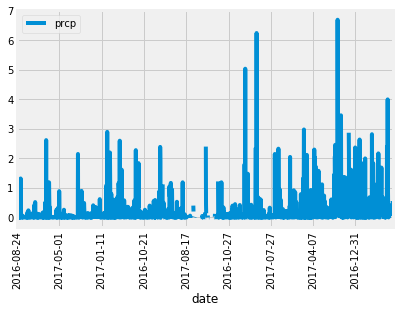

In [19]:
#plt.bar(precip_2017_df['Date'], precip_2017_df['Precipitation'])

precip_2017_df.plot()
plt.xticks(rotation=90)
plt.show()

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
end_date_2017 = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f'One year ago from the last data point in the database is: {end_date_2017[0]}')

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


2019-05-03 11:30:12,784 INFO sqlalchemy.engine.base.Engine SELECT measurement.date AS measurement_date 
FROM measurement ORDER BY measurement.date DESC
 LIMIT ? OFFSET ?
2019-05-03 11:30:12,786 INFO sqlalchemy.engine.base.Engine (1, 0)
One year ago from the last data point in the database is: 2017-08-23


In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_2017_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# Design a query to show how many stations are available in this dataset?
session.query(Measurement.station).group_by(Measurement.station).count()

2019-05-03 11:30:12,821 INFO sqlalchemy.engine.base.Engine SELECT count(*) AS count_1 
FROM (SELECT measurement.station AS measurement_station 
FROM measurement GROUP BY measurement.station) AS anon_1
2019-05-03 11:30:12,823 INFO sqlalchemy.engine.base.Engine ()


9

In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_numbers = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc())
for i in station_numbers:
    print(i)

2019-05-03 11:30:12,847 INFO sqlalchemy.engine.base.Engine SELECT measurement.station AS measurement_station, count(measurement.station) AS count_1 
FROM measurement GROUP BY measurement.station ORDER BY count(measurement.station) DESC
2019-05-03 11:30:12,848 INFO sqlalchemy.engine.base.Engine ()
('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
lowest = session.query(Measurement.tobs).order_by(Measurement.tobs.asc()).first()
highest = session.query(Measurement.tobs).order_by(Measurement.tobs.desc()).first()
average = session.query(func.avg(Measurement.tobs)).order_by(Measurement.tobs).first()

print([lowest, highest, average])

2019-05-03 11:30:12,875 INFO sqlalchemy.engine.base.Engine SELECT measurement.tobs AS measurement_tobs 
FROM measurement ORDER BY measurement.tobs ASC
 LIMIT ? OFFSET ?
2019-05-03 11:30:12,876 INFO sqlalchemy.engine.base.Engine (1, 0)
2019-05-03 11:30:12,885 INFO sqlalchemy.engine.base.Engine SELECT measurement.tobs AS measurement_tobs 
FROM measurement ORDER BY measurement.tobs DESC
 LIMIT ? OFFSET ?
2019-05-03 11:30:12,886 INFO sqlalchemy.engine.base.Engine (1, 0)
2019-05-03 11:30:12,894 INFO sqlalchemy.engine.base.Engine SELECT avg(measurement.tobs) AS avg_1 
FROM measurement ORDER BY measurement.tobs
 LIMIT ? OFFSET ?
2019-05-03 11:30:12,895 INFO sqlalchemy.engine.base.Engine (1, 0)
[(53.0,), (87.0,), (73.09795396419437,)]


In [25]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temps = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc())
for i in station_temps:
    print(i)

2019-05-03 11:30:12,912 INFO sqlalchemy.engine.base.Engine SELECT measurement.station AS measurement_station, count(measurement.tobs) AS count_1 
FROM measurement GROUP BY measurement.station ORDER BY count(measurement.tobs) DESC
2019-05-03 11:30:12,913 INFO sqlalchemy.engine.base.Engine ()
('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [26]:
station_temp_year = session.query(Measurement.station, Measurement.tobs).filter(Measurement.date >= query_date)
for i in station_temp_year:
    print(i)

2019-05-03 11:30:12,947 INFO sqlalchemy.engine.base.Engine SELECT measurement.station AS measurement_station, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE measurement.date >= ?
2019-05-03 11:30:12,948 INFO sqlalchemy.engine.base.Engine ('2016-08-23 00:00:00.000000',)
('USC00519397', 79.0)
('USC00519397', 80.0)
('USC00519397', 79.0)
('USC00519397', 77.0)
('USC00519397', 78.0)
('USC00519397', 78.0)
('USC00519397', 79.0)
('USC00519397', 80.0)
('USC00519397', 81.0)
('USC00519397', 80.0)
('USC00519397', 79.0)
('USC00519397', 75.0)
('USC00519397', 79.0)
('USC00519397', 76.0)
('USC00519397', 76.0)
('USC00519397', 80.0)
('USC00519397', 79.0)
('USC00519397', 78.0)
('USC00519397', 76.0)
('USC00519397', 78.0)
('USC00519397', 78.0)
('USC00519397', 75.0)
('USC00519397', 79.0)
('USC00519397', 80.0)
('USC00519397', 79.0)
('USC00519397', 81.0)
('USC00519397', 77.0)
('USC00519397', 77.0)
('USC00519397', 78.0)
('USC00519397', 76.0)
('USC00519397', 82.0)
('USC00519397', 81.0)
('USC005193

('USC00513117', 76.0)
('USC00513117', 76.0)
('USC00513117', 76.0)
('USC00513117', 78.0)
('USC00513117', 76.0)
('USC00513117', 75.0)
('USC00513117', 75.0)
('USC00513117', 76.0)
('USC00513117', 78.0)
('USC00513117', 75.0)
('USC00513117', 73.0)
('USC00513117', 76.0)
('USC00513117', 76.0)
('USC00513117', 76.0)
('USC00513117', 77.0)
('USC00513117', 76.0)
('USC00513117', 77.0)
('USC00513117', 72.0)
('USC00513117', 77.0)
('USC00513117', 75.0)
('USC00513117', 82.0)
('USC00513117', 77.0)
('USC00513117', 76.0)
('USC00513117', 74.0)
('USC00513117', 73.0)
('USC00513117', 77.0)
('USC00513117', 77.0)
('USC00513117', 77.0)
('USC00513117', 76.0)
('USC00513117', 74.0)
('USC00513117', 76.0)
('USC00513117', 77.0)
('USC00513117', 77.0)
('USC00513117', 77.0)
('USC00513117', 77.0)
('USC00513117', 76.0)
('USC00513117', 77.0)
('USC00513117', 76.0)
('USC00513117', 76.0)
('USC00513117', 79.0)
('USC00513117', 76.0)
('USC00513117', 78.0)
('USC00513117', 76.0)
('USC00513117', 80.0)
('USC00513117', 79.0)
('USC00513

('USC00519523', 78.0)
('USC00519523', 77.0)
('USC00519523', 77.0)
('USC00519523', 77.0)
('USC00519523', 77.0)
('USC00519523', 76.0)
('USC00519523', 80.0)
('USC00519523', 75.0)
('USC00519523', 76.0)
('USC00519523', 75.0)
('USC00519523', 75.0)
('USC00519523', 76.0)
('USC00519523', 78.0)
('USC00519523', 78.0)
('USC00519523', 77.0)
('USC00519523', 76.0)
('USC00519523', 76.0)
('USC00519523', 76.0)
('USC00519523', 75.0)
('USC00519523', 75.0)
('USC00519523', 75.0)
('USC00519523', 70.0)
('USC00519523', 70.0)
('USC00519523', 74.0)
('USC00519523', 73.0)
('USC00519523', 72.0)
('USC00519523', 78.0)
('USC00519523', 67.0)
('USC00519523', 69.0)
('USC00519523', 71.0)
('USC00519523', 74.0)
('USC00519523', 63.0)
('USC00519523', 76.0)
('USC00519523', 76.0)
('USC00519523', 71.0)
('USC00519523', 76.0)
('USC00519523', 77.0)
('USC00519523', 73.0)
('USC00519523', 71.0)
('USC00519523', 78.0)
('USC00519523', 78.0)
('USC00519523', 75.0)
('USC00519523', 75.0)
('USC00519523', 72.0)
('USC00519523', 77.0)
('USC00519

('USC00516128', 78.0)
('USC00516128', 75.0)
('USC00516128', 76.0)
('USC00516128', 77.0)
('USC00516128', 75.0)
('USC00516128', 75.0)
('USC00516128', 73.0)
('USC00516128', 76.0)
('USC00516128', 73.0)
('USC00516128', 74.0)
('USC00516128', 74.0)
('USC00516128', 75.0)
('USC00516128', 75.0)
('USC00516128', 71.0)
('USC00516128', 72.0)
('USC00516128', 75.0)
('USC00516128', 73.0)
('USC00516128', 73.0)
('USC00516128', 73.0)
('USC00516128', 76.0)
('USC00516128', 75.0)
('USC00516128', 70.0)
('USC00516128', 70.0)
('USC00516128', 73.0)
('USC00516128', 73.0)
('USC00516128', 73.0)
('USC00516128', 77.0)
('USC00516128', 76.0)
('USC00516128', 74.0)
('USC00516128', 74.0)
('USC00516128', 77.0)
('USC00516128', 77.0)
('USC00516128', 73.0)
('USC00516128', 74.0)
('USC00516128', 73.0)
('USC00516128', 76.0)
('USC00516128', 74.0)
('USC00516128', 75.0)
('USC00516128', 75.0)
('USC00516128', 73.0)
('USC00516128', 74.0)
('USC00516128', 77.0)
('USC00516128', 74.0)
('USC00516128', 74.0)
('USC00516128', 78.0)
('USC00516

In [27]:
station_temp_df = pd.DataFrame(station_temp_year).set_index("station")
station_temp_df

2019-05-03 11:30:13,150 INFO sqlalchemy.engine.base.Engine SELECT measurement.station AS measurement_station, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE measurement.date >= ?
2019-05-03 11:30:13,151 INFO sqlalchemy.engine.base.Engine ('2016-08-23 00:00:00.000000',)


,tobs
station,
USC00519397,79.0
USC00519397,80.0
USC00519397,79.0
USC00519397,77.0
USC00519397,78.0
USC00519397,78.0
USC00519397,79.0
USC00519397,80.0
USC00519397,81.0


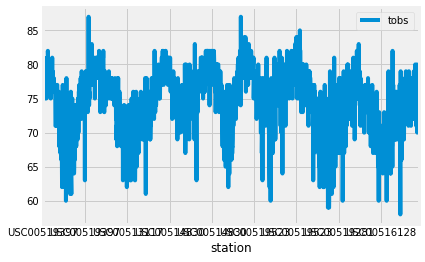

In [28]:
station_temp_df.plot()

![precipitation](Images/station-histogram.png)

In [29]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

2019-05-03 11:30:13,546 INFO sqlalchemy.engine.base.Engine SELECT min(measurement.tobs) AS min_1, avg(measurement.tobs) AS avg_1, max(measurement.tobs) AS max_1 
FROM measurement 
WHERE measurement.date >= ? AND measurement.date <= ?
2019-05-03 11:30:13,547 INFO sqlalchemy.engine.base.Engine ('2012-02-28', '2012-03-05')
[(62.0, 69.57142857142857, 74.0)]


In [30]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
tmin, tmax, tavg = calc_temps('2017-01-01', '2017-01-07')[0]
print(tmin, tmax, tavg)

2019-05-03 11:30:13,568 INFO sqlalchemy.engine.base.Engine SELECT min(measurement.tobs) AS min_1, avg(measurement.tobs) AS avg_1, max(measurement.tobs) AS max_1 
FROM measurement 
WHERE measurement.date >= ? AND measurement.date <= ?
2019-05-03 11:30:13,569 INFO sqlalchemy.engine.base.Engine ('2017-01-01', '2017-01-07')
62.0 68.36585365853658 74.0


In [31]:
dir(func)

['_FunctionGenerator__names',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'opts']

(0, 100)

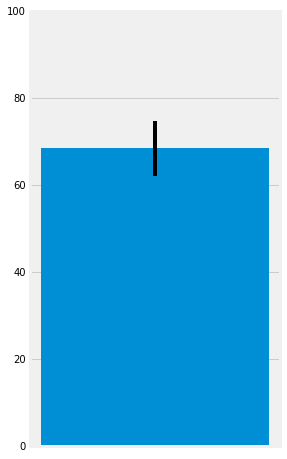

In [32]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
import numpy as np

#session.query(func.avg(Measurement.tobs), np.std(Measurement.tobs)).filter(Measurement.date >= '2011-02-28')\
#.filter(Measurement.date <= '2011-03-05').all()
fig, ax = plt.subplots(figsize=plt.figaspect(2.))
xpos = 1
y_error = (tmax - tmin)
 
plt.bar(xpos, tmax, yerr=y_error)
ax.set(xticks=range(xpos))
plt.ylim(0, 100)

In [40]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
 
session.query(Station.station, func.sum(Measurement.prcp), Station.name, Station.latitude, Station.longitude, Station.elevation)\
    .filter(Measurement.date >= query_date)\
    .order_by(Measurement.prcp.desc()).all()

2019-05-03 13:51:38,819 INFO sqlalchemy.engine.base.Engine SELECT station.station AS station_station, sum(measurement.prcp) AS sum_1, station.name AS station_name, station.latitude AS station_latitude, station.longitude AS station_longitude, station.elevation AS station_elevation 
FROM station, measurement 
WHERE measurement.date >= ? ORDER BY measurement.prcp DESC
2019-05-03 13:51:38,821 INFO sqlalchemy.engine.base.Engine ('2016-08-23 00:00:00.000000',)


[('USC00519397',
  3200.1299999999433,
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0)]

## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


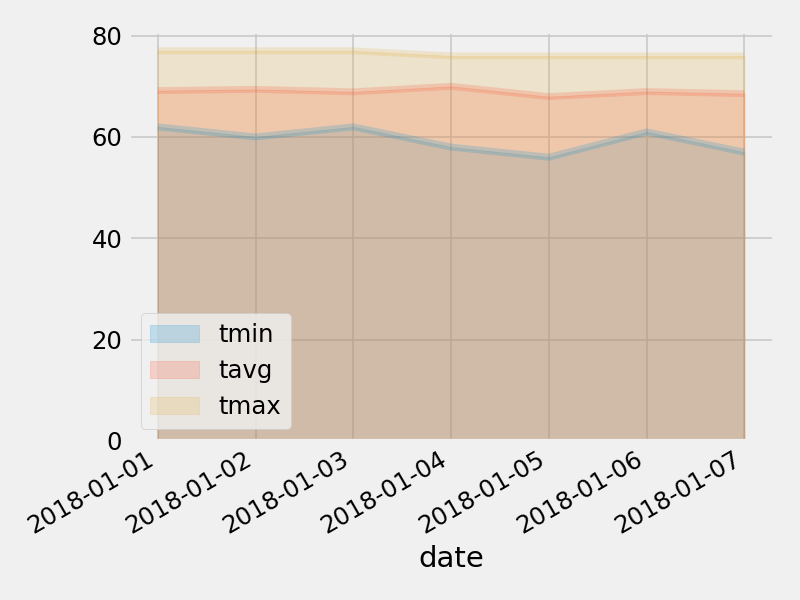

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
